## Ejercicio 2 - Numpy

Se está estudiando el avance de una reacción con el tiempo y se midieron la concentración de un reactivo para cada tiempo, según la siguiente tabla:

| Tiempo (s) | 0 | 600 | 1200 | 1800 | 2400 | 3000 | 3600 | 5400 | 7200 | 9000 |
|---|---|-----|------|------|------|------|------|------|------|------|
| Concentración (mMol/L) | 5.075 | 4.48 | 4.068 | 3.542 | 3.197 | 2.747 | 2.39 | 1.552 | 1.013 | 0.641 |

Se propone estudiar un comportamiento del tipo:
$$K = e^{t\cdot m + b}$$

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

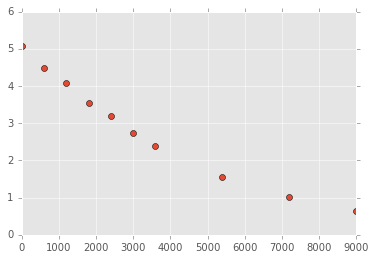

In [2]:
t = np.array([0, 600, 1200, 1800, 2400, 3000, 3600, 5400, 7200, 9000])
K = np.array([5.075, 4.48, 4.068, 3.542, 3.197, 2.747, 2.39, 1.552, 1.013, 0.641]) 
plt.plot(t, K, "o")


1) usa el logaritmo natural `np.log` para linearizar los valores de K.

In [3]:
logK = np.log(K)
print(logK)

[ 1.62432652  1.49962305  1.40315148  1.26469154  1.16221287  1.01050941
  0.87129337  0.43954442  0.01291623 -0.44472582]


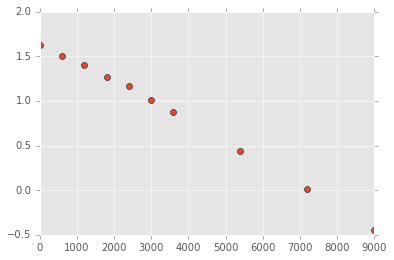

In [4]:
plt.plot(t, logK, "o")

2) usando `scipy.stats.linregress` calcula los valores de m (slope) y b (intercept).

In [5]:
from scipy.stats import linregress
m, b, r_value, p_value, std_err = linregress(t,logK)
print("y = {}x + {}".format(m, b))
print("R^2 = {}".format(r_value**2))
print("P = {}".format(p_value))
print("Error tipico = {}".format(std_err))

y = -0.00023090412559283914x + 1.6740464152277164
R^2 = 0.9978110088741968
P = 6.283689247601573e-12
Error tipico = 3.823706540780736e-06


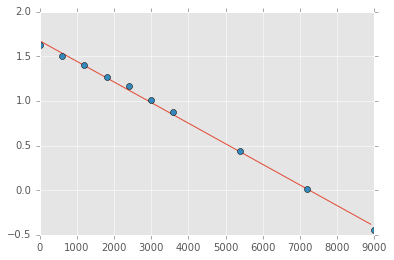

In [6]:
i = np.arange(0,9000,100)
plt.plot(i, m*i+b)
plt.plot(t, logK, "o")

3) Grafica la función no linearizada

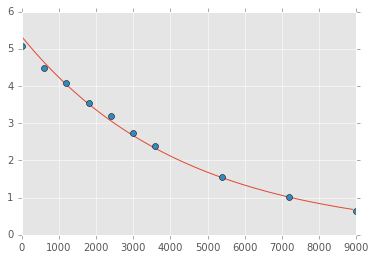

In [7]:
k_func = lambda t : np.exp((t*m + b))
plt.plot(i, k_func(i))
plt.plot(t, K, "o")

4) Calcula los residuales (diferencia entre los valores calculados y los reales).

In [8]:
residuales = K - k_func(t)
print(residuales)

[-0.25870658 -0.16366507  0.0251032   0.02214784  0.13252424  0.0789869
  0.0671577   0.01909575  0.00139648 -0.02658356]


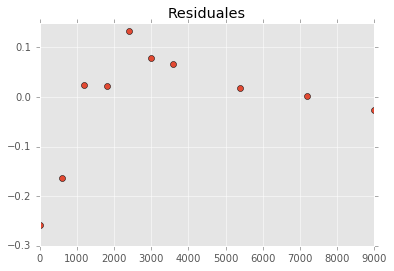

In [9]:
plt.plot(t, K-k_func(t), "o")
plt.title("Residuales")

5) __Extra__: obten los valroes de m y b minimizando los residuales con `scipy.optimize.fmin`.

In [10]:
from scipy.optimize import fmin

# delcaramos una función a minimizar
def minimizar(x):
    b = x[0]
    m = x[1]
    residuales = K - np.exp(m * t + b)
    return (residuales**2).sum()
        
x0 = np.array([5, .01])
xfin = fmin(minimizar, x0, ftol=0.000001)
print("y = {}x + {}".format(xfin[1], xfin[0]))

Optimization terminated successfully.
         Current function value: 0.055725
         Iterations: 53
         Function evaluations: 99
y = -0.0002155879546556329x + 1.641648285971368


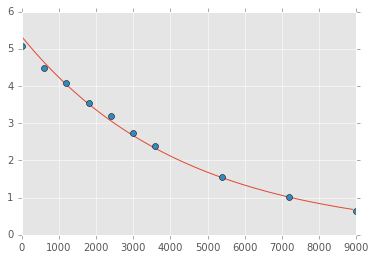

In [11]:
k_func_opt = lambda t : np.exp((t*xfin[1] + xfin[0]))
plt.plot(i, k_func(i))
plt.plot(t, K, "o")

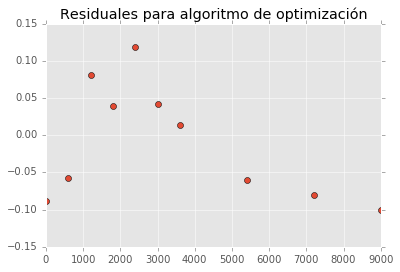

In [12]:
plt.plot(t, K - k_func_opt(t), "o")
plt.title("Residuales para algoritmo de optimización")